### In this notebook, I'm going to try some witchery in order to generate a prediction of temperature from carbon and some other biogeochemical parameters.
#### First, we need to load in the .mat file of interest.
This has been handled by the script `JuliaReadMat.ipynb`, which read the `.mat` file into a Julia dataframe and then wrote it to a CSV, called `24_north.csv` (saved in this folder). We can therefore just read it into python with pandas

In [2]:
import pandas as pd
import numpy as np

alldata_24N_csv_filename = "/Users/ct6g18/Python/keras/ML_Carbon/24_north.csv"
data_24N = pd.read_csv(alldata_24N_csv_filename)

data_24N["DATE"] = data_24N["DATE"] // 10000 # No idea why this is off by ten thousand but whatever.

theta = data_24N["theta"].loc[data_24N['DATE'] < 1993]
dic   = data_24N["dic"].loc[data_24N['DATE'] < 1993]
prs   = data_24N["pressure"].loc[data_24N['DATE'] < 1993]
lon   = data_24N["longitude"].loc[data_24N['DATE'] < 1993]
toxy  = data_24N["toxy"].loc[data_24N['DATE'] < 1993]
NO    = data_24N["NO"].loc[data_24N['DATE'] < 1993]
PO    = data_24N["PO"].loc[data_24N['DATE'] < 1993]
date  = data_24N["DATE"].loc[data_24N['DATE'] < 1993] 


In [3]:
theta = np.asarray(theta)
dic   = np.asarray(dic)
prs   = np.asarray(prs)
lon   = np.asarray(lon)
NO    = np.asarray(NO)
PO    = np.asarray(PO)

theta

array([21.3287, 21.286 , 20.0529, ..., 27.5822, 19.4022, 14.6789])

In [4]:
idx_arr = np.random.permutation(len(theta))

theta = theta[idx_arr]
dic = dic[idx_arr]
prs = prs[idx_arr]
lon = lon[idx_arr]
NO = NO[idx_arr]
PO = PO[idx_arr]

data = np.asarray([theta,dic,prs,lon,NO,PO]).transpose(1,0)
data = np.nan_to_num(data)

Now we're going to want to split this up into training, validation and test data.
It's a fairly small dataset so we can probably reserve 20% for testing.

In [5]:
int(np.floor(len(theta) * 0.8)) # 1812

train_targets = theta[:1812]
test_targets = theta[1812:]

train_data = data[:1812,:]
test_data = data[1812:,:]

mean_values = train_data.mean(axis=0)
std_values = train_data.std(axis=0)

train_data -= mean_values
train_data /= std_values

test_data -= mean_values
test_data /= std_values

Check this has done what we expect

In [6]:
train_data.mean(axis=0)
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

Okay sweet. Now lets get on with training our model

- First lets split the training data into training and validation data

In [7]:
train_data = train_data[:1400,:]
val_data = train_data[1400:,:]

train_targets = train_targets[:1400]
val_targets = train_targets[1400:]

val_data

array([], shape=(0, 6), dtype=float64)

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu'
                      ,input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

model.fit(train_data,train_targets,epochs=15,batch_size=16)
val_mse,val_mae = model.evaluate(test_data,test_targets)
print(f"So the mean error is approximately {val_mae:.2f} degrees")

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-09-30 19:23:21.719355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-30 19:23:21.719481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-30 19:23:22.343347: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-30 19:23:22.343563: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2022-09-30 19:23:30.292294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 11s 11ms/step - loss: 154.9780 - mae: 9.6612
Epoch 2/15
88/88 [==============================] - 1s 7ms/step - loss: 5.8014 - mae: 1.7892
Epoch 3/15
88/88 [==============================] - 1s 7ms/step - loss: 1.1289 - mae: 0.7947
Epoch 4/15
88/88 [==============================] - 1s 7ms/step - loss: 0.4499 - mae: 0.4883
Epoch 5/15
88/88 [==============================] - 1s 7ms/step - loss: 0.2956 - mae: 0.3988
Epoch 6/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1953 - mae: 0.3076
Epoch 7/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1899 - mae: 0.3078
Epoch 8/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1523 - mae: 0.2895
Epoch 9/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1319 - mae: 0.2528
Epoch 10/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1394 - mae: 0.2599
Epoch 11/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1

2022-09-30 19:23:42.058957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 13ms/step - loss: 0.1323 - mae: 0.2847
So the mean error is approximately 0.28 degrees


In [9]:
pred_theta = model.predict(test_data)
actual_theta = test_targets

2022-09-30 19:23:42.466343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, 'Predicted Temperature from DIC, NO, PO, Pressure & Longitude')

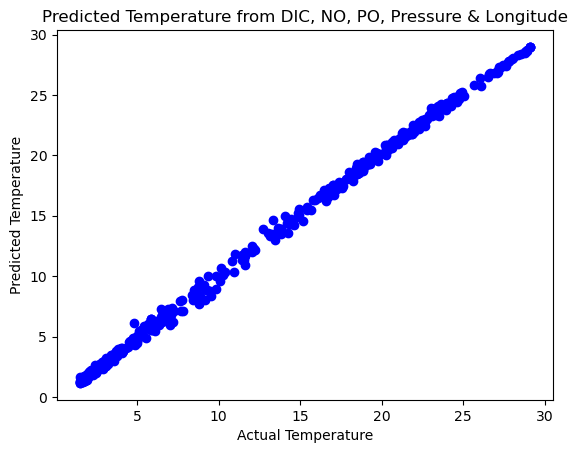

In [10]:
import matplotlib.pyplot as plt
plt.plot(actual_theta,pred_theta,'bo')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predicted Temperature from DIC, NO, PO, Pressure & Longitude')

In [11]:
from sklearn.metrics import r2_score
TestR2Value = r2_score(actual_theta,pred_theta)
print(f"R^2 value = {TestR2Value:.4f}, ie. {100*TestR2Value:.2f}% of variance captured")

R^2 value = 0.9983, ie. 99.83% of variance captured


#### The current implementation uses the full DIC field. 
This isn't what we actually want: we want to use DIC - Canth. This is going to 
give us a larger number of 'DIC' fields but probably a reduced accuracy.

Anyhow, the first thing to do at this point would be to have a look at whether 
we can now us this model to predict the section temperature distribution for the
next cruise.

If that works well, we can then look into predicting the temperature with the 
DIC - Canth change: ie., the redistributed temperature

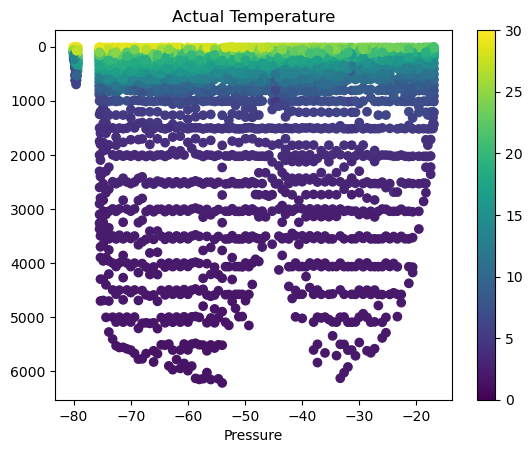

In [17]:
section = plt.scatter(lon, prs, c=theta)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Actual Temperature")
plt.clim(0,30)

In [13]:
pred_theta_all = model.predict(data)
pred_theta_all

array([[ 2.0515082],
       [ 2.6429462],
       [ 5.376423 ],
       ...,
       [ 3.7789083],
       [18.033342 ],
       [12.469    ]], dtype=float32)

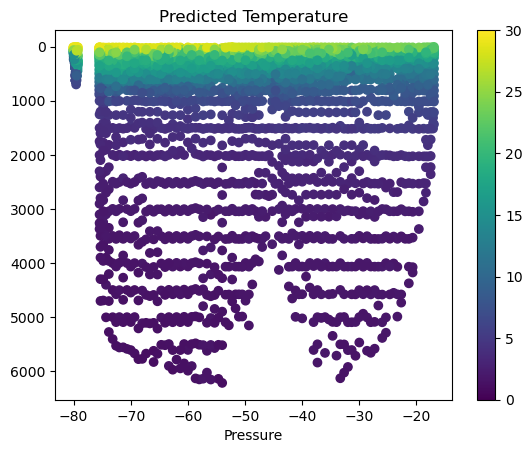

In [14]:
section = plt.scatter(lon, prs, c=pred_theta_all)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Predicted Temperature")
plt.clim(0,30)

In [15]:
pred_theta_all = np.squeeze(np.asarray(pred_theta_all))
theta = np.asarray(theta)
print(f'Predicted temperature shape: {pred_theta_all.shape}')
print(f'Predicted temperature shape: {theta.shape}')


Predicted temperature shape: (2266,)
Predicted temperature shape: (2266,)


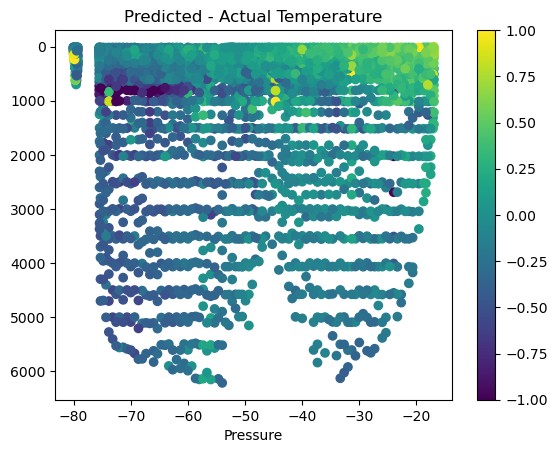

In [18]:
section = plt.scatter(lon, prs, c=pred_theta_all - theta)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Predicted - Actual Temperature")
plt.clim(-1,1)